# Assignment 3 Codes

In [1]:
import numpy as np
import math
import random
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as scio
import pprint as pp

%matplotlib inline 


In [2]:
mat = scio.loadmat('./HW3_Data/dataset1.mat')
Y_Raw = mat['Y']
print('shape of the data is [%d, %d]' % Y_Raw.shape)
Y = np.mat(Y_Raw).T
print('shape of the data is [%d, %d]' % Y.shape)

shape of the data is [40, 200]
shape of the data is [200, 40]


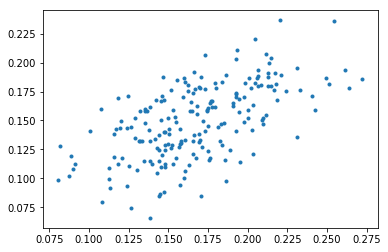

In [3]:
plt.plot(Y_Raw[0], Y_Raw[1], '.')

### Normalize Data

In [4]:
def NormalizeData(X):
    mu = [0] * len(X.T)
    for i in range(len(X)):
        mu += X[i]  
    mu = mu/len(X)
    for i in range(len(X)):
        X[i] = X[i] - mu
    
    
    
    ro2 = 0
    #print(X[0])
    for i in range(len(X)):
        for j in range(len(X[i].A1)):
            #print(X[i].A1[j])
            temp =X[i].A1[j]
            ro2 +=  temp*temp 
    
    ro2 = ro2 / (len(X))
    
    ro = ro2**(1/2)
    
    X = X/ro
    
    return X
    

In [5]:
Y = NormalizeData(Y)
print(Y.shape)

(200, 40)


# 4. PCA Implementation

In [6]:
def kernelGen(X):
    K = []
    for i in range(len(X)):
        temp = []
        for j in range(len(X)):
            xi = np.mat(X[i])
            xj = np.mat(X[j])
            
            temp.append(np.dot(xi,xj.T).A)
        K.append(np.concatenate(temp).ravel().tolist())

    return K

In [7]:
def kernelGen_Alt(X):
    K = []
    for i in range(len(X)):
        temp = []
        for j in range(len(X)):
            xi = np.mat(X[i])
            xj = np.mat(X[j])
            
            ro = 0.01
            
            val = xi - xj
            val = np.linalg.norm(val, ord=2)
            val = val**2
            val = val / 2*(ro**2)
            val = np.exp(-1 * val)
            temp.append(val)

        K.append(temp)

    return K

In [8]:
def KTilda(K):
    N = len(K)
    One = np.ones(N)
    I = np.identity(N)
    prod = (I - (One*One.T)/N)
    K = prod * K * prod
    print('shape of K is [%d, %d]' % K.shape)
    return K

In [9]:
def KPCA(Y, d):
    K = kernelGen(Y)
    #K = KTilda(K)
    
    K_eig = np.linalg.eig(K)
    lam = K_eig[0]
    W = K_eig[1]
    print('shape of the lambdas is [%d]' % lam.shape)
    print('shape of the W is [%d, %d]' % W.shape)
    
    for i in range(len(lam)):
        W[i] *= 1/lam[i]
    
    W_tild = []
    tempL = lam
    tempW = np.array(W)
    for i in range(d):
        topLam = np.argmax(tempL)
        W_tild.append(tempW[topLam])
        
        tempL = np.delete(tempL, topLam)
        tempW = np.delete(tempW, topLam, 0)
    
    W_tild = np.mat(W_tild)
    #print(W_tild)
    X = W_tild * K
    
    return X.A

In [10]:
def KPCA_Alt(Y, d):
    K = kernelGen_Alt(Y)
    #K = KTilda(K)
    
    K_eig = np.linalg.eig(K)
    lam = K_eig[0]
    W = K_eig[1]
    print('shape of the lambdas is [%d]' % lam.shape)
    print('shape of the W is [%d, %d]' % W.shape)
    
    for i in range(len(lam)):
        W[i] *= 1/lam[i]
    
    W_tild = []
    tempL = lam
    tempW = np.array(W)
    for i in range(d):
        topLam = np.argmax(tempL)
        W_tild.append(tempW[topLam])
        
        tempL = np.delete(tempL, topLam)
        tempW = np.delete(tempW, topLam, 0)
    
    W_tild = np.mat(W_tild)
    #print(W_tild)
    X = W_tild * K
    
    return X.A

# 5. Kmeans Implementation

In [11]:
def euclidDist(X,Y):
    X = np.mat(X)
    Y = np.mat(Y)
    
    cost = np.linalg.norm(X-Y,2)
    cost = cost**2
    
    return cost;

In [12]:
euclidDist([0,0],[3,4])

25.0

In [13]:
def assignCenters(X,C):
    Z = np.zeros(len(X))
    for i in range(len(X)):
        bestc = -1;
        bestCost = -1;
        for j in range(len(C)):
            tempCost = euclidDist(X[i],C[j])
            if (bestCost == -1):
                bestc = j
                bestCost = tempCost
            else:
                if(tempCost < bestCost):
                    bestc = j
                    bestCost = tempCost
            
        Z[i] = bestc    
           
    return Z       

In [14]:
assignCenters([[0,0],[1,1],[2,2],[3,3]],[[0,0],[3,3]])


array([ 0.,  0.,  1.,  1.])

In [15]:
def calcCenters(X,Z,C):
    # Needs to be re-written for d > 2
    X = np.mat(X)
    
    for i in range(len(C)):
        tempC = [[0.0] * len(X.T)]
        tempC = np.mat(tempC)
        tempCount = 0
        for j in range(len(Z)):
            if (Z[j] == i):
                np.add(tempC, X[j], out=tempC, casting='unsafe')
                #tempC += X[j]
                tempCount += 1
        if (tempCount > 1):        
            tempC = tempC/tempCount
        #print(tempC)
        C[i] = tempC.A.tolist()
    return C

In [16]:
calcCenters([[0,0],[1,1],[2,2],[3,3]],[0,0,1,1],[[0,0],[3,3]])

[[[0.5, 0.5]], [[2.5, 2.5]]]

In [17]:
def checkConverge(newC,oldC):
    tol = 10**(-6)
    for i in range(len(newC)):
        temp = abs(euclidDist(newC[i], oldC[i]))
        #print(temp)
        if (temp > tol):
            return False
    
    return True

In [18]:
def checkZConverge(newZ, oldZ):
    for i in range(len(newZ)):
        if (newZ[i] != oldZ[i]):
            return False
    return True

In [19]:
def Kmeans(X,k,seed):
    np.random.seed(seed)
    C = []
    Z = [0] * len(X)
    for i in range(k):
        tempC = math.floor((sp.rand(1) * len(X))[0])
        C.append(X[tempC])
    
    converged = False
    ittr = 0
    
    while(converged == False):
        newZ = assignCenters(X,C)
        
        newC = calcCenters(X,newZ,C)
        
        converged = (checkConverge(newC,C) and checkZConverge(newZ, Z))
            
        Z = newZ
        C = newC      
        ittr += 1
        
        if (ittr > 1000):
            converged = True
        
    
    Cluster = []
    for l in range(k):
        tempCluster = []
        for i in range(len(X)):
            if(Z[i] == l):
                tempCluster.append(X[i])
        Cluster.append(tempCluster)       
    
    return [C,Z,k,Cluster]

In [20]:
Kmeans([[0,0],[1,1],[2,2],[3,3]],2,123)

[[[[2.5, 2.5]], [[0.5, 0.5]]],
 array([ 1.,  1.,  0.,  0.]),
 2,
 [[[2, 2], [3, 3]], [[0, 0], [1, 1]]]]

In [21]:
def KmeanCost(X,Z,C):
    cost = 0
    for i in range(len(X)):
        center = C[int(Z[i])]
        point = X[i]
        cost += euclidDist(point,center)
        
    cost = cost / len(X)
    return cost

In [22]:
def outputKmeans(k_val, X):
    C = k_val[0]
    Z = k_val[1]
    k = k_val[2]
    clusters = k_val[3]
    

    for l in range(k):
        X_1t = []
        X_2t = []
        for i in range(len(X)):
            if (Z[i] == l):
                X_1t.append(X[i][0])
                X_2t.append(X[i][1])
    
        plt.plot(X_1t, X_2t, '.')
    
    C_1 = []
    C_2 = []
    for i in range(len(C)):
        C_1.append(C[i][0])
        C_2.append(C[i][1])
    
    plt.plot(C_1,C_2, 'o')    
    
    title = "X1 vs X2 K:" +  str(k)
    plt.title(title)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [23]:
def KmeanMain(X,k,r):
    bestrun = 0
    bestCost = 100
    for i in range(r):
        k_val = Kmeans(X,k,i+1)
        C = k_val[0]
        Z = k_val[1]
        k = k_val[2]
        clusters = k_val[3]
        
        cost = KmeanCost(X,Z,C)
        if (cost < bestCost):
            bestCost = cost
            bestrun = i+1
        
    pp.pprint("Min Cost: " +  str(bestCost))
    k_val = Kmeans(X,k,bestrun)
    
        
    return k_val[3]

# 6. Spectral Clustering Implementation

In [24]:
def wij(i,j, ro):
    val = i - j
    val = np.linalg.norm(val, ord=2)
    val = val**2
    val = val / 2*(ro**2)
    val = np.exp(-1 * val)
    #print(val)
    return val

In [25]:
def getkNN(Y,yi, k ):
    temp = []
    for i in range(len(Y)):
        temp.append([euclidDist(Y[i], yi), i])
    
    temp.sort()
    temp = temp[1:(k +1)]
    for i in range(len(temp)):
        temp[i] = temp[i][1:]
    return temp

In [26]:
getkNN(Y, Y[0], 3)

[[33], [74], [16]]

In [27]:
def buildWMatrix(Y,k, ro):
    W = []
    for i in range(len(Y)):
        temp = []
        knn = getkNN(Y, Y[i], k)
        for j in range(len(Y)):
            if [j] in knn:
                temp.append(wij(Y[i],Y[j], ro))
            else:
                temp.append(0)
        
        W.append(temp)
    
    return W

In [28]:
W = buildWMatrix(Y, 5, 0.2)

W = np.mat(W)
print(W.shape)

(200, 200)


In [29]:
def buildLaplacian(W):
    D = np.zeros((len(W),len(W)))
    for i in range(len(W)):
        D[i][i] = np.sum(W[i])
        
    L = D-W 
    return L

In [30]:
L = buildLaplacian(W)
print(L.shape)

(200, 200)


In [31]:
def spectralCluster(W, Y, k):
    L = buildLaplacian(W)
    Leig = np.linalg.eig(L)
    Lv = Leig[1]
    V = []
    for i in range(k):
        temp = Lv[i].A1.tolist()
        V.append(temp)
    

    V = np.mat(V).T
    clusters = KmeanMain(V.tolist(), k, 10)
    
    newClusters = []
    for i in range(len(clusters)):
        temp = []
        for j in range(len(clusters[i])):
            
            index = V.A.tolist().index(clusters[i][j])
            temp.append(Y.T[index])

        newClusters.append(temp)    
        
        
    return newClusters

# 7. Test Data

## Part A

shape of the data is [40, 200]


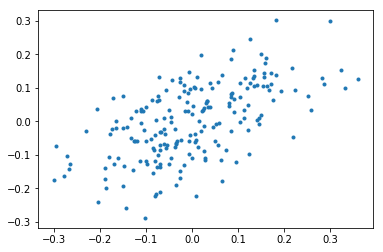

In [32]:
mat = scio.loadmat('./HW3_Data/dataset1.mat')
Y_Raw = mat['Y']
print('shape of the data is [%d, %d]' % Y_Raw.shape)
Y = np.mat(Y_Raw).T
newY = NormalizeData(Y)
plotY = newY.T.A
plt.plot(plotY[0],plotY[1], '.')

#### i. There doesn't appear to be any meaningful shape to this data. it looks like it might generally follow a shape of y = x

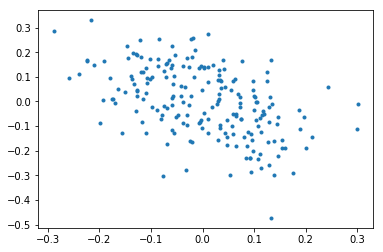

In [33]:
plt.plot(plotY[1], plotY[2],'.')

#### ii. There doesn't appear to be any meaningful shape to this data.

shape of the lambdas is [200]
shape of the W is [200, 200]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


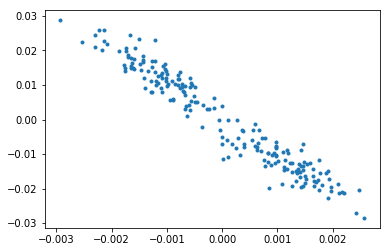

In [34]:
X = KPCA(newY, 2)
plt.plot(X[0], X[1], '.')

#### iii. it looks like there are two semi-distinct clusters to the data, the cluster for X1 > 0 and X1 < 0

'Min Cost: 0.444624302619'
shape of the lambdas is [97]
shape of the W is [97, 97]
shape of the lambdas is [103]
shape of the W is [103, 103]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


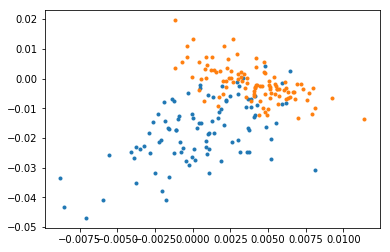

In [35]:
Clusters = KmeanMain(newY,2,10)

for i in range(len(Clusters)):
    Clusters[i] = KPCA(Clusters[i],2)

for i in range(len(Clusters)):
    plt.plot(Clusters[i][0].T, Clusters[i][1].T, '.')

#### iv. It does look like kmeans was unable to seperate the data very well at dimension 40.  I applied PCA to the clusters to better visualize the results. It's possible the overlap in the clusters visually is due to the application of PCA.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


'Min Cost: 4.35285622763e-05'


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


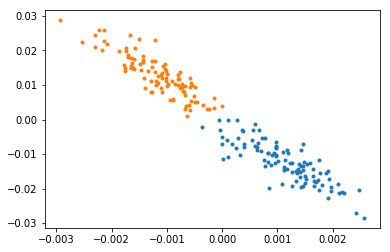

In [36]:
Clusters = KmeanMain(X.T,2,10)
for i in range(len(Clusters)):
    cluster = np.mat(Clusters[i]).T
    cluster = cluster.tolist()
    plt.plot(cluster[0], cluster[1], '.')

#### v. the data was pretty well segregated into 2 clusters that are linearly seperable.

#### vi. The two methods (PCA first vs Kmeans first) were both able to segregate the data int clusters although the PCA first was a little messier.

## Part B

shape of the data is [40, 200]


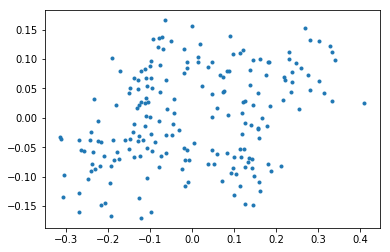

In [37]:
mat = scio.loadmat('./HW3_Data/dataset2.mat')
Y_Raw = mat['Y']
print('shape of the data is [%d, %d]' % Y_Raw.shape)
Y = np.mat(Y_Raw).T
newY = NormalizeData(Y)
plotY = newY.T.A
plt.plot(plotY[0],plotY[1], '.')

#### i. There doesn't appear to be any meaningful shape to this data.

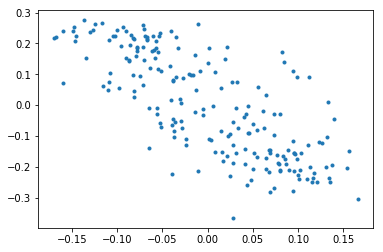

In [38]:
plt.plot(plotY[1], plotY[2],'.')

#### ii. There doesn't appear to be any meaningful shape to this data. it could be a line?

shape of the lambdas is [200]
shape of the W is [200, 200]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


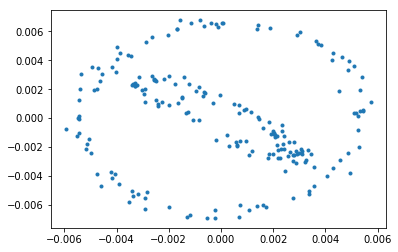

In [39]:
X = KPCA(newY, 2)
plt.plot(X[0], X[1], '.')

#### iii. It looks like there are two distinct clusters, there appear to be two ellipses, one encircling the other.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


'Min Cost: 3.1016197276e-05'


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


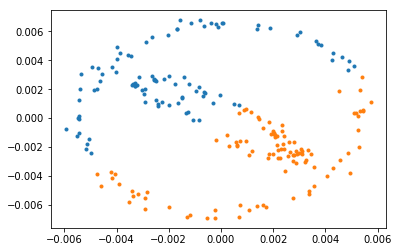

In [40]:
Clusters = KmeanMain(X.T,2,10)
for i in range(len(Clusters)):
    cluster = np.mat(Clusters[i]).T
    cluster = cluster.tolist()
    plt.plot(cluster[0], cluster[1], '.')

#### iv. K-means was not able to seperate the data because the center of the outer circle is in the middle of the other circle.  The clusters have the same center!  A different aproach will be needed to seperate the two.

shape of the lambdas is [200]
shape of the W is [200, 200]


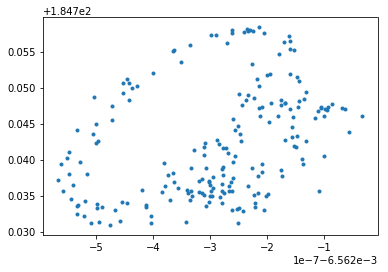

In [41]:
X = KPCA_Alt(newY, 2)
plt.plot(X[0], X[1], '.')

'Min Cost: 1.43967577066e-05'


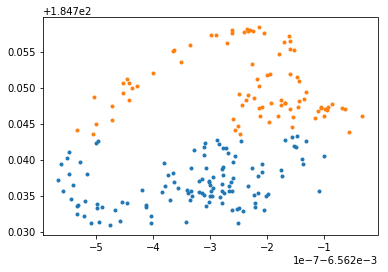

In [42]:
Clusters = KmeanMain(X.T,2,10)
for i in range(len(Clusters)):
    cluster = np.mat(Clusters[i]).T
    cluster = cluster.tolist()
    plt.plot(cluster[0], cluster[1], '.')

#### v. KPCA using the provided Kernel is no more sucessful at recovering the data because the two clusters are still inter-locked in the 2d projection.  

K:  15  ro:  0.01


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


'Min Cost: 0.00907540337633'
shape of the lambdas is [30]
shape of the W is [30, 30]
shape of the lambdas is [170]
shape of the W is [170, 170]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


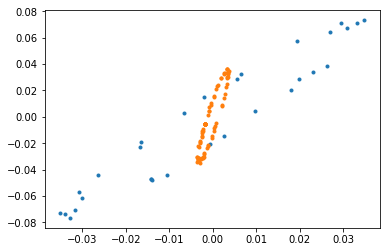

In [47]:
K = 15
ro = 0.01

print("K: ", K, " ro: ", ro)
W = buildWMatrix(Y,K, ro)
W = np.mat(W)

Clusters =spectralCluster(W,Y.T, 2)

for i in range(len(Clusters)):
    Clusters[i] = KPCA(Clusters[i],2)

for i in range(len(Clusters)):
    plt.plot(Clusters[i][0].T, Clusters[i][1].T, '.')

#### vi.  Spectral Clustering was able to recover the clusters because it treats the data based on the local structure of the data, not just on the euclidian distance from one point to the other.